In [19]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "../part4/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('../part4/data/시도별_전출입_인구수.xlsx')

# NaN 값을 바로 위의 값으로 변환
df = df.ffill()

# 데이터프레임 생략 안되게 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
def choongnam_graph(location, df, fig, ax, color1, color2):
    mask_to_choongnam = (df['전출지별'] == location) & (df['전입지별'] == '충청남도')
    mask_choongnam_to = (df['전출지별'] == '충청남도') & (df['전입지별'] == location)
    df_to_choongnam = df[mask_to_choongnam]
    df_to_choongnam = df_to_choongnam.drop(['전입지별'], axis=1)
    df_to_choongnam = df_to_choongnam.rename({'전출지별' : f'{location}->충남'}, axis=1)
    df_to_choongnam = df_to_choongnam.set_index(f'{location}->충남')
    # 빈칸 값 0으로 대체하기
    for i in range(len(df_to_choongnam['1970']) - 1):
        for j in range(len(df_to_choongnam.iloc[0])):
            if(df_to_choongnam.iloc[i,j] == '-'):
                df_to_choongnam.iloc[i,j] = 0
                
    df_choongnam_to = df[mask_choongnam_to]
    df_choongnam_to = df_choongnam_to.drop(['전출지별'], axis=1)
    df_choongnam_to = df_choongnam_to.rename({'전입지별' : '전입지'}, axis=1)
    df_choongnam_to = df_choongnam_to.set_index('전입지')
    # 빈칸 값 0으로 대체하기
    for i in range(len(df_choongnam_to['1970']) - 1):
        for j in range(len(df_choongnam_to.iloc[0])):
            if(df_choongnam_to.iloc[i,j] == '-'):
                df_choongnam_to.iloc[i,j] = 0
                
    col_years = list(map(str, range(1970, 2018)))
    
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(col_years, df_to_choongnam, marker='o', markerfacecolor=color1,
            markersize=5, color=color1, linewidth=2, label=df_to_choongnam.iloc[1].name)
    ax.plot(col_years, df_choongnam_to, marker='o', markerfacecolor=color2,
            markersize=5, color=color2, linewidth=2, label=df_choongnam_to.iloc[1].name)
    
    ax.legend(loc='best')
    ax.set_title('충남 인구 전출지별 유입량', size=20)
    ax.set_xlabel('기간', size=12)
    ax.set_ylabel('인구수', size=12)
    ax.set_xticks(range(len(col_years)))
    ax.set_xticklabels(col_years, rotation=90)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    return fig, ax

fig, ax = choongnam_graph('서울특별시', df, fig, ax, 'red', 'blue')
        

IndexError: single positional indexer is out-of-bounds

In [31]:
# to_choongnam : 충남 인구 유입량, choongnam_to : 충남 인구 유출량
mask_to_choongnam = (df['전출지별'] != '충청남도') & (df['전입지별'] == '충청남도')
mask_choongnam_to = (df['전출지별'] == '충청남도') & (df['전입지별'] != '충청남도')

##################################충남 인구 유입량 처리#######################################
# df_to_choongnam : 충남 인구 유입량
df_to_choongnam = df[mask_to_choongnam]
df_to_choongnam = df_to_choongnam[1:]
df_to_choongnam = df_to_choongnam.drop(['전입지별'], axis=1)
df_to_choongnam = df_to_choongnam.rename({'전출지별' : '전출지'}, axis=1)
df_to_choongnam = df_to_choongnam.set_index('전출지')

# '충남 유입량' index 추가
df_to_choongnam.loc['충남 유입량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_to_choongnam['1970']) - 1):
    for j in range(len(df_to_choongnam.iloc[0])):
        if(df_to_choongnam.iloc[i,j] == '-'):
            df_to_choongnam.iloc[i,j] = 0
            
# 충남 유입량 계산
for i in range(len(df_to_choongnam['1970']) - 1):
    df_to_choongnam.loc['충남 유입량', :] += df_to_choongnam.iloc[i]
############################################################################################
# df_choongnam_to : 충남 인구 유출량
df_choongnam_to = df[mask_choongnam_to]
df_choongnam_to = df_choongnam_to[1:]
df_choongnam_to = df_choongnam_to.drop(['전출지별'], axis=1)
df_choongnam_to = df_choongnam_to.rename({'전입지별' : '전입지'}, axis=1)
df_choongnam_to = df_choongnam_to.set_index('전입지')

# '충남 유출량' index 추가
df_choongnam_to.loc['충남 유출량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_choongnam_to['1970']) - 1):
    for j in range(len(df_choongnam_to.iloc[0])):
        if(df_choongnam_to.iloc[i,j] == '-'):
            df_choongnam_to.iloc[i,j] = 0


# 충남 유출량 계산
for i in range(len(df_choongnam_to['1970']) - 1):
    df_choongnam_to.loc['충남 유출량', :] += df_choongnam_to.iloc[i]
##############################################################################################
df_to_choongnam

서울특별시->충남


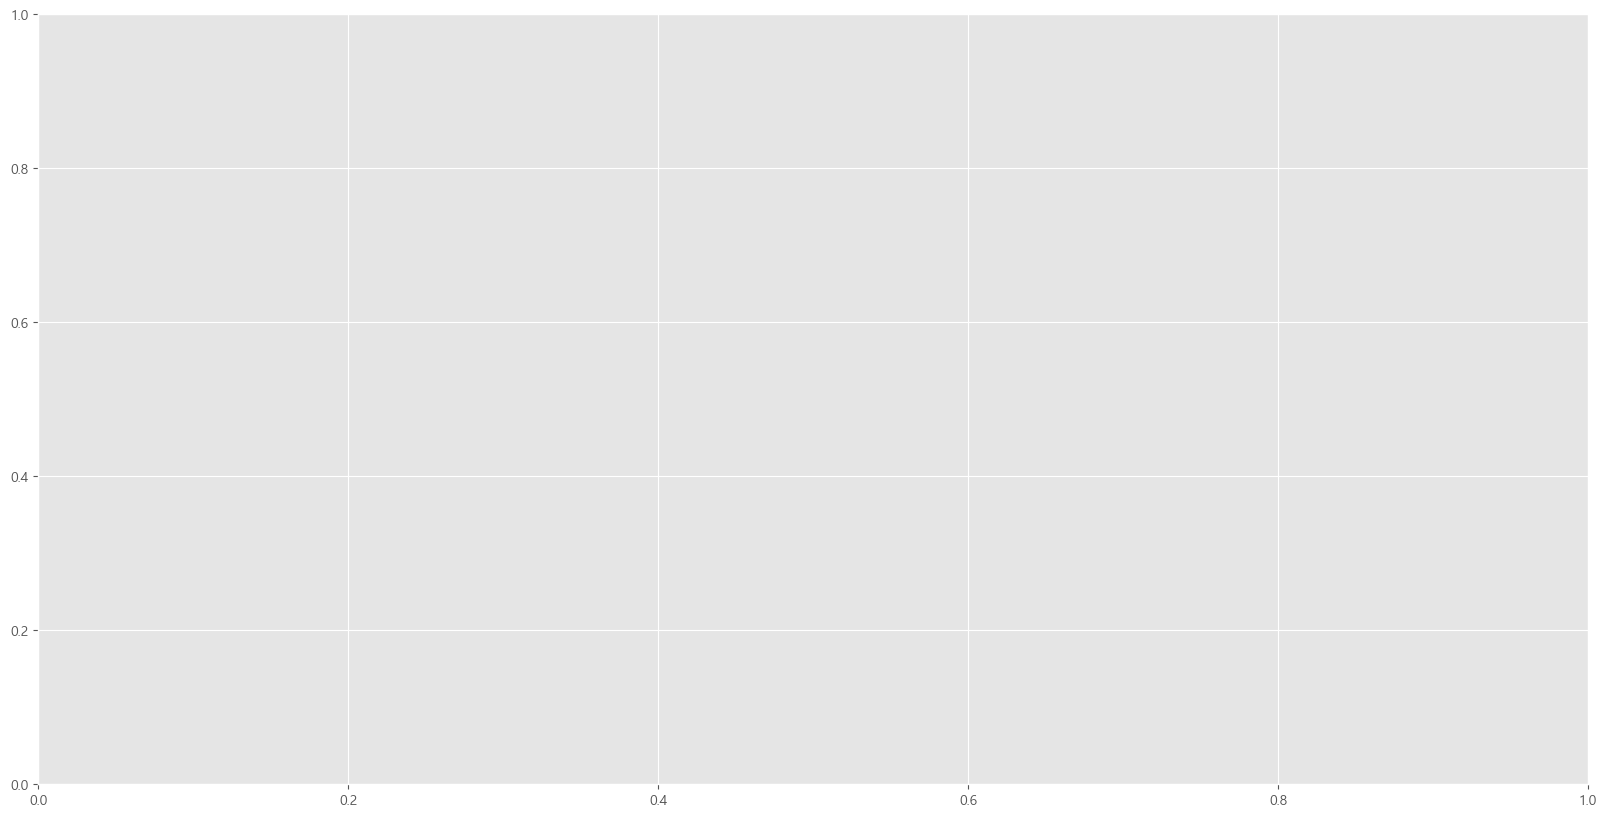

In [21]:
# 축 년도
col_years = list(map(str, range(1970, 2018)))
to_choongnam = df_to_choongnam.loc['충남 유입량', :]
choongnam_to = df_choongnam_to.loc['충남 유출량', :]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
fig = plt.figure(figsize=(20, 10))

# ax_inflow = fig.add_subplot(1, 2, 1)
# ax_outflow = fig.add_subplot(1, 2, 2)

# # 색깔
# colorss = [ 'brown', 'red', 'coral', 'orangered', 'gold', 'yellow', 'greenyellow', 'yellowgreen', 'darkolivegreen', 'darkgreen', 'lightsteelblue', 'royalblue', 'blue', 'mediumpurple', 'blueviolet', 'violet']

# # axe 객체에 plot 함수로 '충남 유입량' 그래프 출력
# for i in range(len(colorss)):
#     ax_inflow.plot(col_years, df_to_choongnam.iloc[i], marker='', markerfacecolor=colorss[i],
#             markersize=5, color=colorss[i], linewidth=2, label=df_choongnam_to.iloc[i].name)
# # ax_inflow.plot(col_years, to_choongnam, marker='o', markerfacecolor='red',
# #        markersize=5, color='red', linewidth=2, label='총 유입량')

# # axe 객체에 plot 함수로 '충남 유출량' 그래프 출력
# for i in range(len(colorss)):
#     ax_outflow.plot(col_years, df_choongnam_to.iloc[i], marker='', markerfacecolor=colorss[i],
#             markersize=5, color=colorss[i], linewidth=2, label=df_to_choongnam.iloc[i].name)
# # ax_outflow.plot(col_years, choongnam_to, marker='o', markerfacecolor='skyblue',
# #         markersize=5, color='skyblue', linewidth=2, label='총 유입량')

# # 범례 표시
# ax_inflow.legend(loc='best')
# ax_outflow.legend(loc='best')

# # 차트 제목 추가
# ax_inflow.set_title('충남 인구 전출지별 유입량', size=20)
# ax_outflow.set_title('충남 인구 전입지별 유출량', size=20)

# # 축 이름 추가
# ax_inflow.set_xlabel('기간', size=12)
# ax_inflow.set_ylabel('인구수', size=12)
# ax_outflow.set_xlabel('기간', size=12)
# ax_outflow.set_ylabel('인구수', size=12)

# # 축 눈금 위치 지정
# ax_inflow.set_xticks(range(len(col_years)))
# ax_outflow.set_xticks(range(len(col_years)))

# # x축 눈금 라벨 회전하기
# ax_inflow.set_xticklabels(col_years, rotation=90)
# ax_outflow.set_xticklabels(col_years, rotation=90)

# # 축 눈금 레이블 크기
# ax_inflow.tick_params(axis='x', labelsize=10)
# ax_inflow.tick_params(axis='y', labelsize=10)
# ax_outflow.tick_params(axis='x', labelsize=10)
# ax_outflow.tick_params(axis='y', labelsize=10)

# plt.show()